**Сбербанк, Работа с данными на Python. Толстиков Валентин**

## Анализ причин выжимаемости на Титанике

В качестве первого домашнего задания Вам предстоит сформулировать и проверить гипотезы о причинах выживаемости на Титанике. Необходимые данные можно найти на [GitHub](https://github.com/aleksei-riabykh/sberbank_data_analysis_06_07_21/tree/master/data/titanic) курса, описание к данным на сайте соревнований по анализу данных [Kaggle](https://www.kaggle.com/c/titanic/data). 

Критерии оценивания:
* Четко сформулированы гипотезы и выводы из них
* Гипотез не меньше 3-х
* Присутствуют кросс-признаковые гипотезы (например, процент выживаемости среди молодых женщин: пол + возраст)
* Использованы группировки `.groupby()` с агрегированием `.aggregate()`, трансформацией `.transform()` или фильтрацией  `.filter()` данных
* Присутствует визуализация
* Присутствует общий вывод исследования

## Шаблон исследования

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
path = './data/titanic/train.csv'
data = pd.read_csv(path)

### Гипотеза 1

__Формулировка__:
Выживаемость зависит от пола пассажира.

In [3]:
def count_of_survivors(x):
    return sum(x)


def count_of_perished(x):
    return len(x) - sum(x)


def proportion_of_survivors(x):
    return sum(x) / len(x)


agg_func = ['count', count_of_survivors, count_of_perished, proportion_of_survivors]

In [4]:
data.groupby(['Sex'])['Survived'].aggregate(agg_func)

,count,count_of_survivors,count_of_perished,proportion_of_survivors
Sex,,,,
female,314,233,81,0.742038
male,577,109,468,0.188908


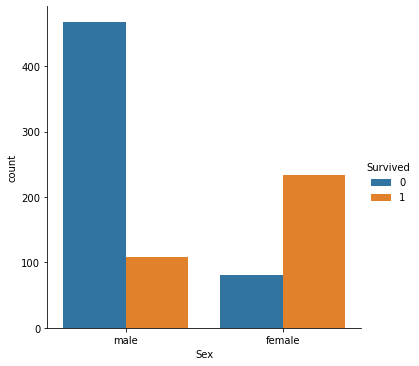

In [5]:
sns.catplot(x='Sex', hue='Survived', kind='count', data=data);

Видим, что выживаемость сильно зависит от пола пассажира: среди женщин доля выживших намного больше, чем среди мужчин.

Из лекции мы знаем, что на выживаемость повлиял класс, которым путешествовал пассажир, поэтому посмотрим также на выживаемость в зависимости от пола в разрезе по классам:

In [6]:
df = data.groupby(['Pclass', 'Sex'])['Survived'].aggregate(agg_func)
df

count  count_of_survivors  count_of_perished  \
Pclass Sex                                                    
1      female     94                  91                  3   
       male      122                  45                 77   
2      female     76                  70                  6   
       male      108                  17                 91   
3      female    144                  72                 72   
       male      347                  47                300   

               proportion_of_survivors  
Pclass Sex                              
1      female                 0.968085  
       male                   0.368852  
2      female                 0.921053  
       male                   0.157407  
3      female                 0.500000  
       male                   0.135447

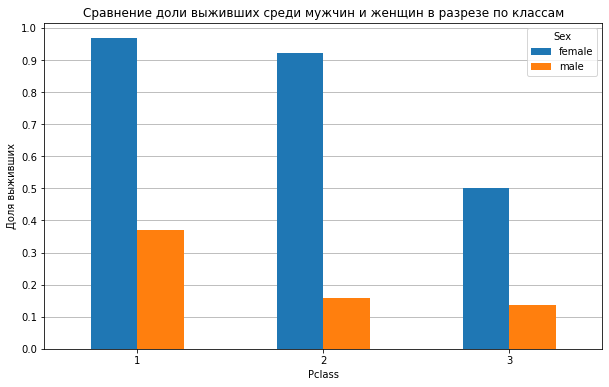

In [7]:
fig, ax = plt.subplots(figsize=(10, 6))
df.unstack()['proportion_of_survivors'].plot(kind='bar', rot=0, ax=ax)
ax.set(yticks=np.linspace(0, 1, 11), ylabel='Доля выживших', axisbelow=True,
       title='Сравнение доли выживших среди мужчин и женщин в разрезе по классам')
ax.grid(axis='y')

Видим, что для всех классов доля выживших женщин намного больше, чем доля выживших мужчин.

__Вывод__: Пол пассажира на самом деле сильно повлиял на выживаемость. Доля выживших среди женщин намного больше, чем доля выживших среди мужчин, причём такое соотношение сохраняется для каждого класса.

###  Гипотеза 2

__Формулировка__:
Выживаемость зависит от возраста пассажира.

Для проверки гипотезы разделим пассажиров по возрастным группам:

In [8]:
print('Минимальный возраст пассажира: {}'.format(data['Age'].min()))
print('Максимальный возраст пассажира: {}'.format(data['Age'].max()))

Минимальный возраст пассажира: 0.42
Максимальный возраст пассажира: 80.0


In [9]:
age_bins = np.arange(0, 81, 10)
data['Age_group'] = pd.cut(data['Age'], bins=age_bins)
data['Age_group'] = data['Age_group'].cat.add_categories(['Нет данных']).fillna('Нет данных')
data['Age_group'].value_counts()

(20, 30]      230
Нет данных    177
(30, 40]      155
(10, 20]      115
(40, 50]       86
(0, 10]        64
(50, 60]       42
(60, 70]       17
(70, 80]        5
Name: Age_group, dtype: int64

In [10]:
df = data.groupby(['Age_group'])['Survived'].aggregate(agg_func)
df

,count,count_of_survivors,count_of_perished,proportion_of_survivors
Age_group,,,,
"(0, 10]",64,38,26,0.593750
"(10, 20]",115,44,71,0.382609
"(20, 30]",230,84,146,0.365217
"(30, 40]",155,69,86,0.445161
"(40, 50]",86,33,53,0.383721
"(50, 60]",42,17,25,0.404762
"(60, 70]",17,4,13,0.235294
"(70, 80]",5,1,4,0.200000
Нет данных,177,52,125,0.293785


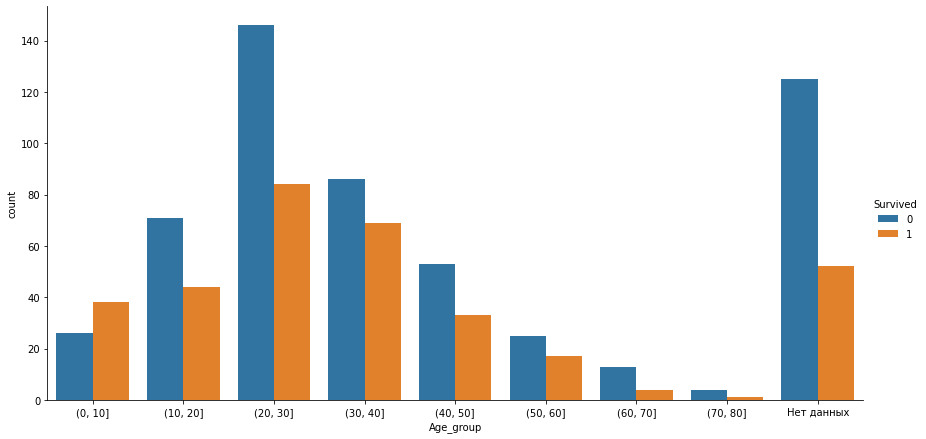

In [11]:
sns.catplot(x='Age_group', hue='Survived', kind='count', data=data, height=6, aspect=2);

Видим, что в каждой возрастной группе, за исключением группы **(0, 10]**, количество погибших больше, чем количество выживших.

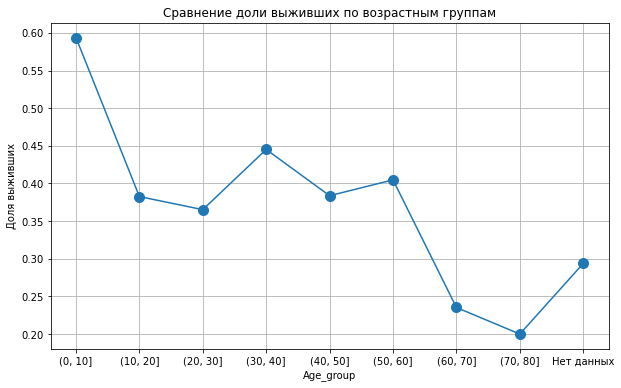

In [12]:
fig, ax = plt.subplots(figsize=(10, 6))
df['proportion_of_survivors'].plot(marker='o', markersize=10, ax=ax)
ax.set_ylabel('Доля выживших')
ax.set_title('Сравнение доли выживших по возрастным группам')
ax.grid(True)
plt.show()

Наибольшие шансы выжить были у пассажиров в возрастной группе **(0, 10]**, в возрастных группах от **10** до **60** лет выживаемость примерно на одном уровне (35 - 45%), а у пассажиров старше **60** лет шансы выжить наименьшие.

Т. к. пол пассажира сильно влияет на выживаемость, то посмотрим также на выживаемость по возрастным группам в зависимости от пола:

In [13]:
df = data.groupby(['Sex', 'Age_group'])['Survived'].aggregate(agg_func)
df

count  count_of_survivors  count_of_perished  \
Sex    Age_group                                                  
female (0, 10]        31                19.0               12.0   
       (10, 20]       46                34.0               12.0   
       (20, 30]       81                61.0               20.0   
       (30, 40]       55                46.0                9.0   
       (40, 50]       31                21.0               10.0   
       (50, 60]       14                13.0                1.0   
       (60, 70]        3                 3.0                0.0   
       (70, 80]        0                 NaN                NaN   
       Нет данных     53                36.0               17.0   
male   (0, 10]        33                19.0               14.0   
       (10, 20]       69                10.0               59.0   
       (20, 30]      149                23.0              126.0   
       (30, 40]      100                23.0               77.0   
       (40, 50]       55                12.0               43.0   
       (50, 60]       28                 4.0               24.0   
       (60, 70]       14                 1.0               13.0   
       (70, 80]        5                 1.0                4.0   
       Нет данных    124                16.0              108.0   

                   proportion_of_survivors  
Sex    Age_group                            
female (0, 10]                    0.612903  
       (10, 20]                   0.739130  
       (20, 30]                   0.753086  
       (30, 40]                   0.836364  
       (40, 50]                   0.677419  
       (50, 60]                   0.928571  
       (60, 70]                   1.000000  
       (70, 80]                        NaN  
       Нет данных                 0.679245  
male   (0, 10]                    0.575758  
       (10, 20]                   0.144928  
       (20, 30]                   0.154362  
       (30, 40]                   0.230000  
       (40, 50]                   0.218182  
       (50, 60]                   0.142857  
       (60, 70]                   0.071429  
       (70, 80]                   0.200000  
       Нет данных                 0.129032

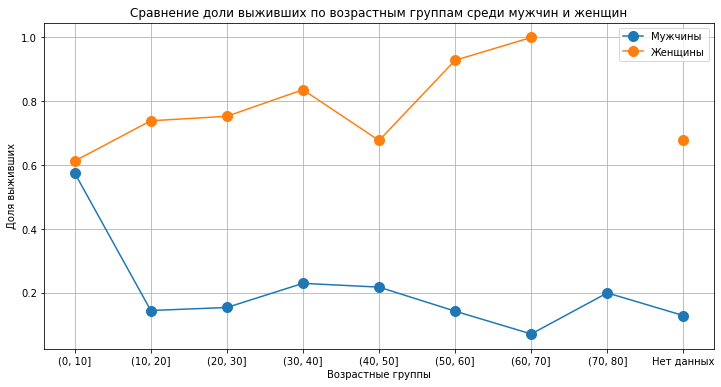

In [14]:
fig, ax = plt.subplots(figsize=(12, 6))

df.loc['male', 'proportion_of_survivors'].plot(label='Мужчины', marker='o', markersize=10, ax=ax)
df.loc['female', 'proportion_of_survivors'].plot(label='Женщины', marker='o', markersize=10, ax=ax)
ax.set(xlabel='Возрастные группы', ylabel='Доля выживших',
       title='Сравнение доли выживших по возрастным группам среди мужчин и женщин')
ax.legend()
ax.grid(True)
plt.show()

У женщин в каждой возрастной группе процент выживших больше **60%**. Тогда как у мужчин, за исключением группы **(0, 10]**, выживаемость находится примерно на одном уровне и не превышает **23**%.

__Вывод__: У мужчин возраст не оказывает существенного влияния на выживаемость: за исключением детей (возрастная группа **(0, 10]**), у которых выживаемость около **58%**, выживаемость находится примерно на одном уровне.

У женщин также нельзя сказать, что возраст оказывает существенное влияние на выживаемость: хотя и видна некоторая положительная корреляция доли выживших с возрастом, надо учитывать, что в старших возрастных группах (старше 50 лет) количество женщин было значительно меньше, чем в других возрастных группах, и если не учитывать старшие возрастные группы, то никакой корреляции выделить нельзя.

При этом в каждой возрастной группе доля выживших женщин больше доли выживших мужчин.

### Гипотеза 3
 
__Формулировка__: Внутри групп пассажиров, разделённых по полу и классу цена за билет у выживших выше, чем у погибших.

Для проверки гипотезы сравним средние и медианные цены за билет среди выживших и погибших разделённых на группы по полу и классу:

In [15]:
df = data.groupby(['Sex', 'Pclass', 'Survived'])['Fare'].aggregate(['count', 'median', 'mean'])
df

count     median        mean
Sex    Pclass Survived                              
female 1      0             3  151.55000  110.604167
              1            91   82.17080  105.978159
       2      0             6   17.00000   18.250000
              1            70   23.00000   22.288989
       3      0            72   14.47915   19.773093
              1            72    9.46875   12.464526
male   1      0            77   42.40000   62.894910
              1            45   35.50000   74.637320
       2      0            91   13.00000   19.488965
              1            17   18.75000   21.095100
       3      0           300    7.89580   12.204469
              1            47    8.05000   15.579696

В некоторых группах оказалось совсем небольшое число выживших, статистика по таким группам может носить случайный характер. Поэтому будем рассматривать только те группы, в которых и среди выживших и среди погибших оказалось более 10 человек:

In [16]:
df = data.groupby(['Sex', 'Pclass']).filter(lambda x: (x['Survived'].value_counts() > 10).all())
df = df.groupby(['Sex', 'Pclass', 'Survived'])['Fare'].aggregate(['count', 'median', 'mean'])
df = df.unstack()
df

count        median                 mean           
Survived          0   1         0         1          0          1
Sex    Pclass                                                    
female 3         72  72  14.47915   9.46875  19.773093  12.464526
male   1         77  45  42.40000  35.50000  62.894910  74.637320
       2         91  17  13.00000  18.75000  19.488965  21.095100
       3        300  47   7.89580   8.05000  12.204469  15.579696

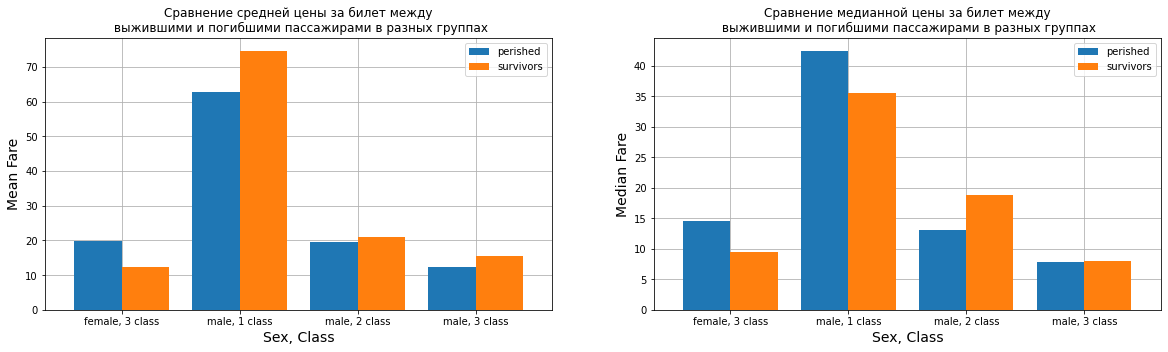

In [17]:
fig = plt.figure(figsize=(20, 5))

ax = plt.subplot(1, 2, 1)
df['mean'].plot(kind='bar', width=0.8, ax=ax)
ax.legend(['perished', 'survivors'])
ax.set_xticklabels(['{}, {} class'.format(*x) for x in df.index], rotation=0)
ax.set_xlabel('Sex, Class', fontsize=14)
ax.set_ylabel('Mean Fare', fontsize=14)
ax.set_title('Сравнение средней цены за билет между\n выжившими и погибшими пассажирами в разных группах')
ax.set_axisbelow(True)
ax.grid(True)

ax = plt.subplot(1, 2, 2)
df['median'].plot(kind='bar', width=0.8, ax=ax)
ax.legend(['perished', 'survivors'])
ax.set_xticklabels(['{}, {} class'.format(*x) for x in df.index], rotation=0)
ax.set_xlabel('Sex, Class', fontsize=14)
ax.set_ylabel('Median Fare', fontsize=14)
ax.set_title('Сравнение медианной цены за билет между\n выжившими и погибшими пассажирами в разных группах')
ax.set_axisbelow(True)
ax.grid(True)

plt.show()

В разных группах средняя и медианная цены за билет выше то у погибших, то у выживших, а в группе мужчин из первого класса средняя цена за билет выше среди погибших, а медианная - среди выживших.

__Вывод__: Наше изначальное предположение о том, что у выживших пассажиров цена за билет была выше, чем у погибших оказалось неверным.

### Вывод исследования:

  

На выживаемость наибольшее влияние оказал пол пассажира: во всех классах и во всех возрастных группах доля выживших женщин больше доли выживших мужчин.

Также сильное влияние на выживаемость оказал класс, которым путешествовал пассажир: чем выше класс - тем больше был шанс выжить.

Возраст пассажиров не оказал существенного влияния на выживаемость, за единственным исключением - среди мальчиков в возрасте до десяти лет доля выживших более чем в два раза больше, чем в других возрастных группах мужчин.

Таким оказалось, что наибольший шанс выжить был у женщин, путешествовавших первым и вторым классом,
а наименьший шанс - у мужчин старше 10 лет, путешествовавших вторым и третьим классом.